![Alt text](http://www.ucm.es/logo/ucm.png "a title")

<div align="center"> 
<font size=5> Máster en Nuevas Tecnologías Electrónicas y Fotónicas </font>
</div>
    
<div align="center"> 
<font size=4> Óptica Digital, curso 2021-2022 </font>
</div>

    
<div align="center"> 
<font size=4> Ejercicio 5 - Diseño de elementos Ópticos Difractivos </font>
</div>

- **Fecha**: 26/10/2021
        
- **Alumno**: Luis Miguel Sánchez Brea   


# Introducción

En este ejercicio nos vamos a centrar en el diseño de elementos ópticos difractivos. Vamos a generar kinoformas, que luego pasaremos a máscaras binarias de amplitud o fase. En lugar de tener un algoritmo específico, geraremos máscaras de fase continúas y el paso final será, si es necesario, convertirlas en ampliftud y/o binarias.

- Diseño de máscaras.
- Verificaión del resultado.
- Grabación de máscaras como .bmp. Dichas máscaras nos servirán para la Práctica de laboratorio 3.

El algoritmo de propagación se proporcionará a través del archivo "IFTA.py".

Dentro de este archivo están las siguientes funciones:

- GS_far_algorithm. Permite realizar el algoritmo IFTA en campo lejano
- GS_near_algoritm. Permite realizar el algoritmo IFTA en campo cercano
- binarize. Realiza el proceso de binarización de la máscara generada
- nmse. Parámetro de calidad que compara la máscara objetivo y el resultado.

# Enunciados

1. **Diseño de una máscara en campo lejano.**

    a. Genere una distribución de intensidad objetivo compleja, target, a través de un .bmp o Scalar_mask_XY.
    
    b. Utilice el algoritmo GS_far_algorithm de IFTA.py para diseñar un DOE cuyo target sea la distribución de luz en campo lejano para la imagen propuesta. Dibuje la máscara generada. Dibuje la historia de error del algoritmo
    
    c. Determine la distribución de intensidad en campo lejano. Utilice la función verify_mask. 
  
    d. Determine el error comparando mediante la funcion mnse el objetivo (target) y el resultado. Grabe la máscara
          

2. **Diseño de una máscara en campo cercano**

    a. Sea una distribución objetivo formada por un único punto en el centro de la imagen (0,0). Dicha distribución de luz está ubicada a una distancia z = 2 mm de la máscara a calcular. Determine, con el algoritmo IFTA de campo cercano la máscara de fase. Calcule la intensidad obtenida por dicha máscara.
    
    b. Realice el mismo cálculo para una distribución objetivo de 2 puntos en el eje x equidistantes del centro (-a,0), (a,0).
    
    d. Realice el mismo cálculo para una máscara cuadrada. Para este último caso verifique el resultado en amplitud-continua, amplitud-binaria, fase-continua, fase-binaria

<div class="alert alert-block alert-success">
    
<b>Nota:</b>
    
En todos los casos, especialmente en las kinoformas de amplitud, es conveniente eliminar el orden 0 de la intensidad obtenida, pues reduce la visibilidad del resultado.

    - Para la función fft, hay un parámetro específico.

    - Al usar verify_mask en campo lejano, escriba z=0 o z=None
    
</div>



Proponga un valor para los parámetros que no vengan en el enunciado. En todos los casos, los resultados son gráficas de intensidad y fase luminosa.

<div class="alert alert-block alert-info">

<b>Consejos:</b>
    
    - Para una mejor observación y rapidez en los cálculos, utilice una máscara de 512 x 512 pixeles.
    
    - El tamaño de la máscara puede ser 1 mm.
    

</div>

## Importar módulos 


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib
import matplotlib.cm as cm

from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.utils_drawing import draw_several_fields
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

number of processors: 8
total memory        : 15.5 Gb
available memory    : 58 %
max frequency       : 3100 GHz


In [3]:
from IFTA import GS_far_algorithm, GS_scalar_Fresnel, binarize, nmse, insert_pupil, verify_mask

# Ejercicio 1

**a) Genere una distribución de intensidad objetivo que desee, target, a través de un dibujo o Scalar_mask_XY.**

In [4]:
size=1*mm
num_x=num_y=512
wavelength=0.6328*um

num_steps=25

(<Figure size 500x500 with 1 Axes>,
 <AxesSubplot:xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x7fc8f29d1520>)

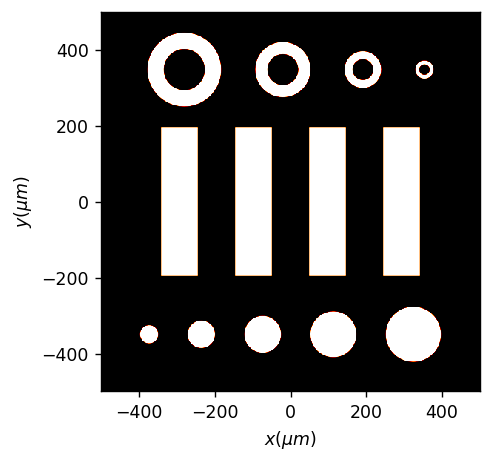

In [5]:
x=np.linspace(-size/2, size/2, num_x)
y=np.linspace(-size/2, size/2, num_y)

target=Scalar_mask_XY(x,y,wavelength)
target.image('imagenes_masks/mascara1024.png')
target.draw()

**b) Utilice el algoritmo GS_far_algorithm** 

In [6]:
mask, errors = GS_far_algorithm(None,target,num_steps=num_steps)

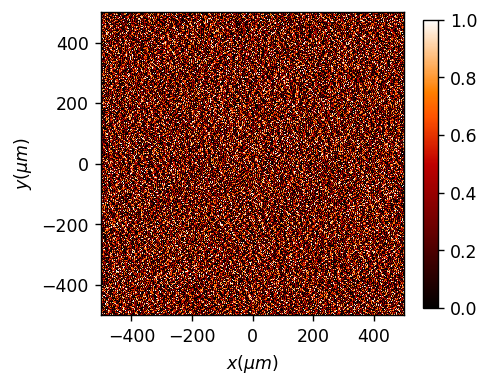

In [7]:
mask.draw(has_colorbar='vertical');

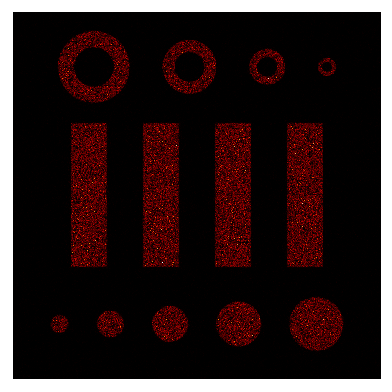

In [8]:
DOE_new, result= verify_mask(mask,
                z=0,
                has_mask=True,
                is_phase=True,
                is_binary=False,
                has_draw=True,
                has_axis=False,
                is_logarithm=False)

**d. Determine el error comparando mediante la funcion mnse el objetivo (target) y el resultado. Grabe la máscara**


In [9]:
intensity_result = result.intensity()
intensity_target = target.intensity()

In [10]:
error_ejecucion = nmse(intensity_target, intensity_result)
print("error = {:2.8f}".format(error_ejecucion))

error = 0.00000461


In [11]:
DOE_new.save_mask('parte1.bmp', kind='phase');

# Ejercicio 2

## a) 1 punto

In [12]:
size=1*mm
num_x=num_y=512
wavelength=0.6328*um

z_distance= 15*mm
num_steps=10

(<Figure size 500x500 with 1 Axes>,
 <AxesSubplot:xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x7fc8f279e940>)

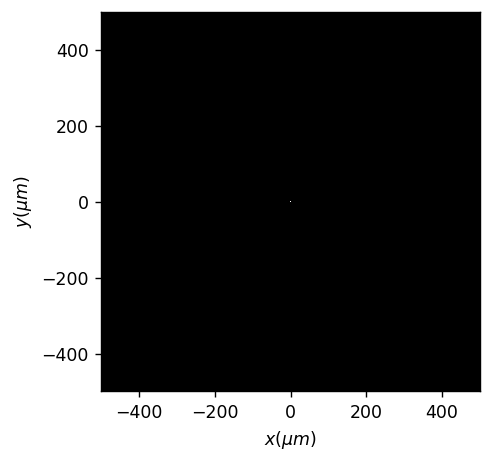

In [13]:
x=np.linspace(-size/2, size/2, num_x)
y=np.linspace(-size/2, size/2, num_y)

target=Scalar_mask_XY(x,y,wavelength)
# target.circle(r0=(0,0),radius=5*um)
target.dots(r0=(0,0))
target.draw()

0.9999915918689548 5.597125654583289e-06


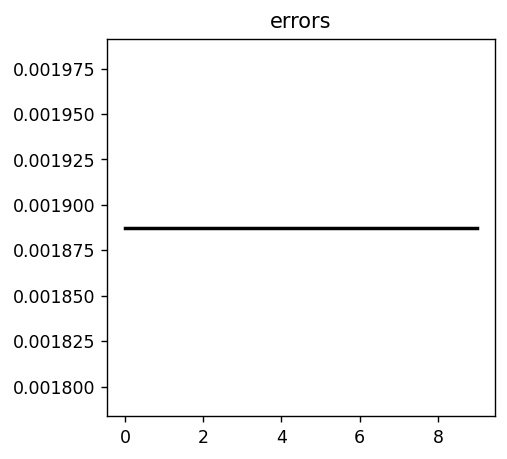

In [14]:
mask, errors = GS_scalar_Fresnel(None,target, z=z_distance,    num_steps=num_steps, has_draw=True)

In [15]:
mask=insert_pupil(mask)

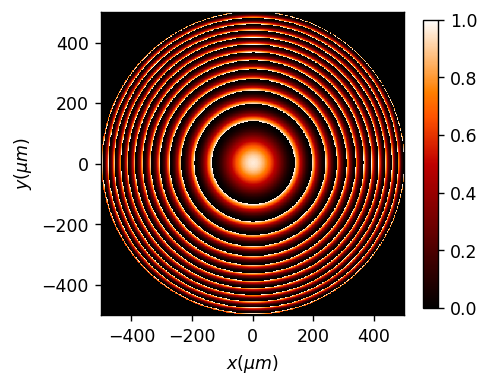

In [16]:
mask.draw(has_colorbar='vertical');

In [17]:
mask.save_mask('parte2a.bmp', kind='amplitude');

**b) Verificación de la máscara**

(<diffractio.scalar_fields_XY.Scalar_field_XY at 0x7fc8f28bf7f0>,
 <diffractio.scalar_fields_XY.Scalar_field_XY at 0x7fc8f28bf4f0>)

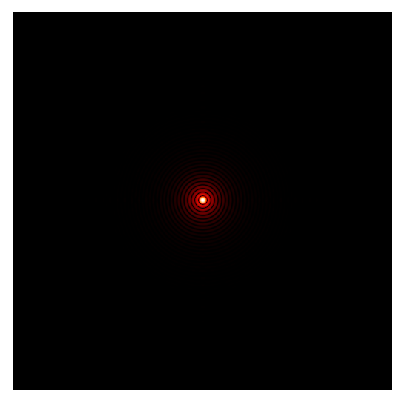

In [18]:
verify_mask(mask,
                z=z_distance,
                has_mask=True,
                is_phase=True,
                is_binary=False,
                has_draw=True,
                has_axis=False,
                is_logarithm=True)

**Another possibility**

In [19]:
mask_matrix=mask.u

In [20]:
mask.u=np.exp(1j*2*np.pi*mask_matrix)

(<Figure size 500x500 with 1 Axes>,
 <AxesSubplot:xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x7fc8f2964880>)

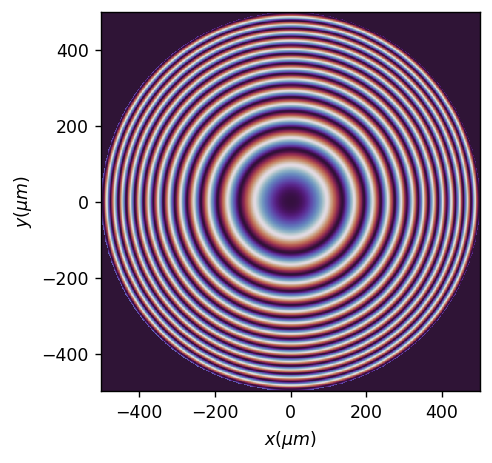

In [21]:
mask.draw('phase')

In [22]:
result_mask_phase= mask.RS(z=z_distance, new_field=True, verbose=True)

Good result: factor 4.81


(<Figure size 500x500 with 1 Axes>,
 <AxesSubplot:xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x7fc8f26e9a90>)

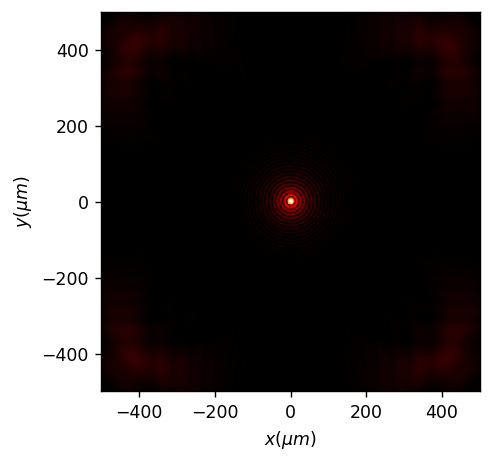

In [23]:
result_mask_phase.draw(logarithm=True)

## b) 2 puntos

In [24]:
size=1*mm
num_x=num_y=512
wavelength=0.6328*um

z_distance= 15*mm
num_steps=10

(<Figure size 500x500 with 1 Axes>,
 <AxesSubplot:xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x7fc8f2dcbf70>)

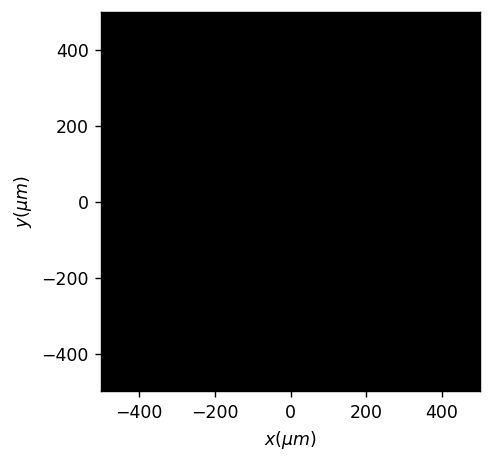

In [25]:
x=np.linspace(-size/2, size/2, num_x)
y=np.linspace(-size/2, size/2, num_y)

target=Scalar_mask_XY(x,y,wavelength)
target.dots(r0=([-250, 250],[0,0]))
target.draw()

0.9999933193733006 9.091263007319611e-07


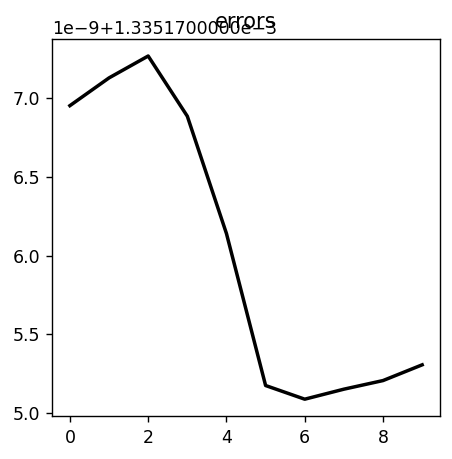

In [26]:
mask, errors = GS_scalar_Fresnel(None,target, z=z_distance,    num_steps=num_steps, has_draw=True)

In [27]:
mask=insert_pupil(mask)

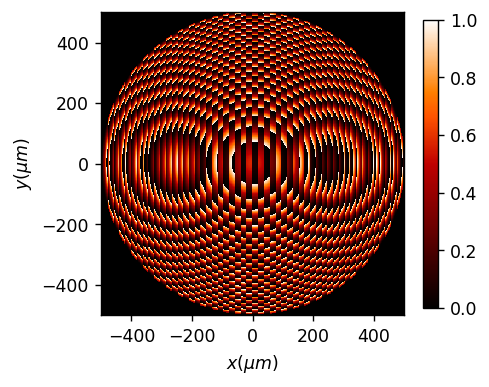

In [28]:
mask.draw(has_colorbar='vertical');

In [29]:
mask.save_mask('parte2b.bmp', kind='amplitude');

**b) Verificación de la máscara**

(<diffractio.scalar_fields_XY.Scalar_field_XY at 0x7fc8f2cac700>,
 <diffractio.scalar_fields_XY.Scalar_field_XY at 0x7fc8f2cacc10>)

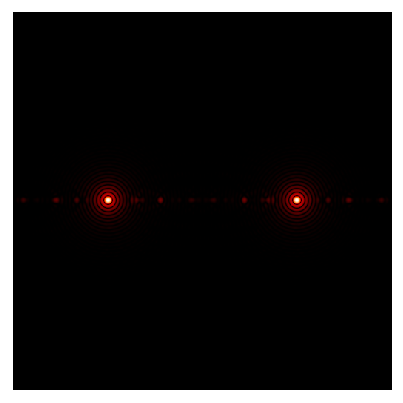

In [30]:
verify_mask(mask,
                z=z_distance,
                has_mask=True,
                is_phase=True,
                is_binary=False,
                has_draw=True,
                has_axis=False,
                is_logarithm=True)

**Another possibility**

In [31]:
mask_matrix=mask.u

In [32]:
mask.u=np.exp(1j*2*np.pi*mask_matrix)

In [33]:
result_mask_phase= mask.RS(z=z_distance, new_field=True, verbose=True)

Good result: factor 4.81


(<Figure size 500x500 with 1 Axes>,
 <AxesSubplot:xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x7fc8f2c39af0>)

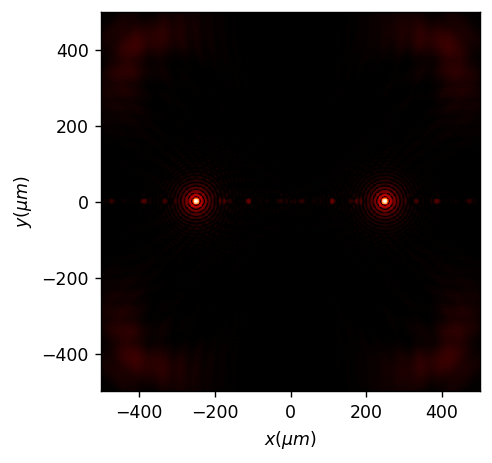

In [34]:
result_mask_phase.draw(logarithm=True)

## c) Cuadrado

In [35]:
size=0.25*mm
num_x=num_y=512
wavelength=0.6328*um

z_distance= 1*mm
num_steps=10

(<Figure size 500x500 with 1 Axes>,
 <AxesSubplot:xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x7fc8f2c69430>)

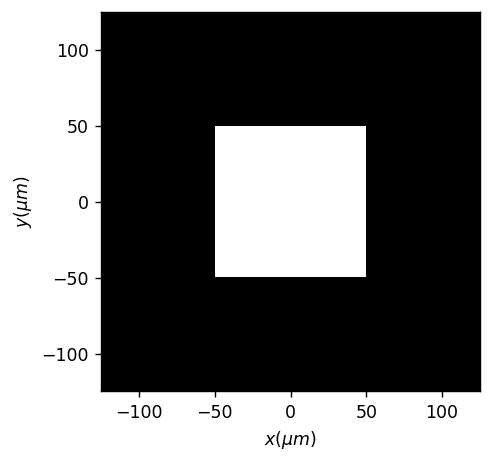

In [36]:
x=np.linspace(-size/2, size/2, num_x)
y=np.linspace(-size/2, size/2, num_y)

target=Scalar_mask_XY(x,y,wavelength)
target.square(r0=(0,0), size=100*um, angle=0)
target.draw()

In [37]:
intensity_result = target.intensity()

0.9999992066899119 2.185604025050845e-06


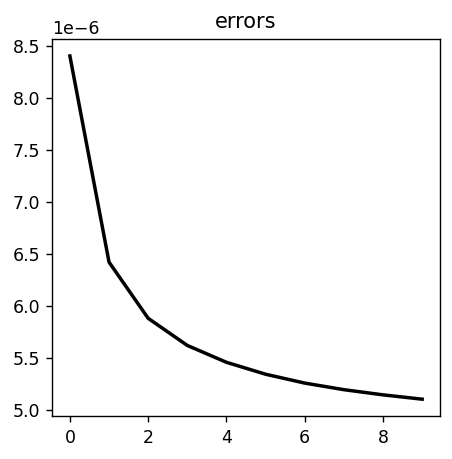

In [38]:
mask, errors = GS_scalar_Fresnel(None,target, z=z_distance,    num_steps=num_steps, has_draw=True)

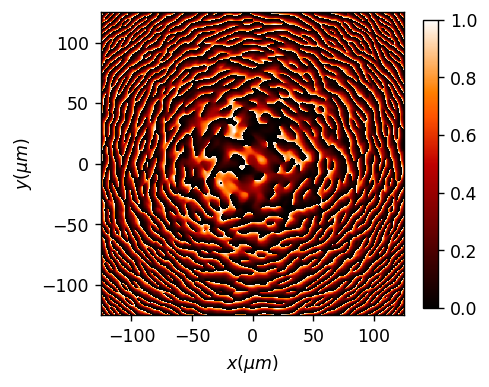

In [39]:
mask.draw(has_colorbar='vertical');

In [40]:
mask.save_mask('parte2c.bmp', kind='amplitude');

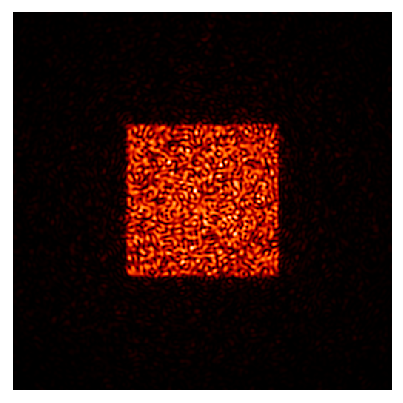

In [41]:
DOE_new, result= verify_mask(mask,
                z=z_distance,
                has_mask=True,
                is_phase=True,
                is_binary=False,
                has_draw=True,
                has_axis=False,
                is_logarithm=True)

In [42]:
intensity_result = result.intensity()
error_ejecucion = nmse(intensity_target, intensity_result)
print("error = {:2.8f}".format(error_ejecucion))

error = 0.00001089


In [43]:
intensity_target = target.intensity()

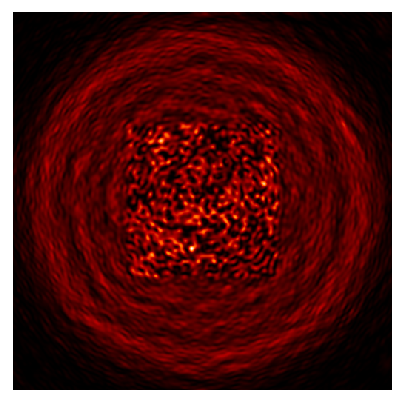

In [44]:
DOE_new, result= verify_mask(mask,
                z=z_distance,
                has_mask=True,
                is_phase=False,
                is_binary=False,
                has_draw=True,
                has_axis=False,
                is_logarithm=True)

In [45]:
intensity_result = result.intensity()
error_ejecucion = nmse(intensity_target, intensity_result)
print("error = {:2.8f}".format(error_ejecucion))

error = 0.00000816


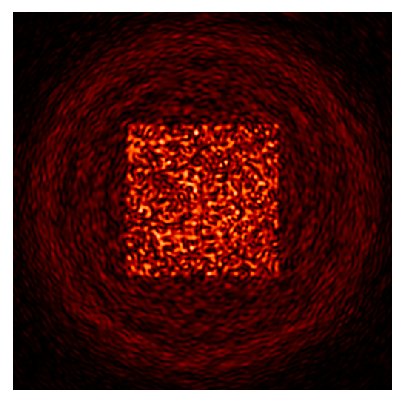

In [46]:
DOE_new, result= verify_mask(mask,
                z=z_distance,
                has_mask=True,
                is_phase=True,
                is_binary=True,
                has_draw=True,
                has_axis=False,
                is_logarithm=True)

In [47]:
intensity_result = result.intensity()
error_ejecucion = nmse(intensity_target, intensity_result)
print("error = {:2.8f}".format(error_ejecucion))

error = 0.00000652


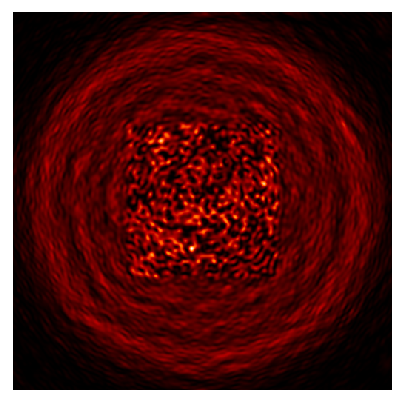

In [48]:
DOE_new, result= verify_mask(mask,
                z=z_distance,
                has_mask=True,
                is_phase=False,
                is_binary=True,
                has_draw=True,
                has_axis=False,
                is_logarithm=True)

In [49]:
intensity_result = result.intensity()
error_ejecucion = nmse(intensity_target, intensity_result)
print("error = {:2.8f}".format(error_ejecucion))

error = 0.00000816
